# Fit - multiple mesurements

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

# load data
data_A = np.loadtxt('spectrum_A.txt')

velocities_A = data_A[:,0]
intensity_A = data_A[:,1]

data_B = np.loadtxt('spectrum_B.txt')

velocities_B = data_B[:,0]
intensity_B = data_B[:,1]

data_C = np.loadtxt('spectrum_C.txt')

velocities_C = data_C[:,0]
intensity_C = data_C[:,1]

# setup common objects
beam = nx.Beam()
beam.Unpolarized()

# define a measurement for each temperature

# there are common fit parameters as the isomer shift and the quadrupole splitting
# they should be the same for every measurement
# so we define them independently of the measurement

isomer_for_all = nx.Var(1.1, min = 0, max = 1.2, fit = True, id = "isomer")

quadrupole_for_all = nx.Var(1.0, min = 0.5, max = 1.2, fit = True, id = "quadrupole")


# the magnetic field and the Lamb-Moessbauer factor are sample specific and have to be defined for each measurement

# ---- iron experiment at temperature A ----

site_A = nx.Hyperfine(weight = 1,
                      isomer = isomer_for_all,
                      magnetic_field = nx.Var(27, min = 15, max = 40, fit = True, id = "magnetic field A"),
                      quadrupole = quadrupole_for_all,
                      isotropic = True)

mat_iron_A = nx.Material(composition = [["Fe", 1]],
                         density = 7.8,
                         isotope = nx.lib.moessbauer.Fe57,
                         abundance = 0.02119,
                         lamb_moessbauer = nx.Var(0.81, min = 0.5, max = 1, fit = True, id = "Lamb Moessbauer A"),
                         hyperfine_sites = [site_A])

layer_iron_A = nx.Layer(thickness = 1000,
                        material = mat_iron_A)

sample_A = nx.Sample(layers = [layer_iron_A],
                     geometry = "f")

experiment_A = nx.Experiment(beam = beam,
                             objects = [sample_A],
                             isotope = nx.lib.moessbauer.Fe57)

moessbauer_spec_A = nx.MoessbauerSpectrum(experiment = experiment_A,
                                          velocity = velocities_A,
                                          intensity_data = intensity_A)
                                          

# ---- iron experiment at temperature B ----

site_B = nx.Hyperfine(weight = 1,
                      isomer = isomer_for_all,
                      magnetic_field = nx.Var(23, min = 15, max = 40, fit = True, id = "magnetic field B"),
                      quadrupole = quadrupole_for_all,
                      isotropic = True)

mat_iron_B = nx.Material(composition = [["Fe", 1]],
                         density = 7.8,
                         isotope = nx.lib.moessbauer.Fe57,
                         abundance = 0.02119,
                         lamb_moessbauer = nx.Var(0.63, min = 0.5, max = 1, fit = True, id = "Lamb Moessbauer B"),
                         hyperfine_sites = [site_B])

layer_iron_B = nx.Layer(thickness = 1000,
                        material = mat_iron_B)

sample_B = nx.Sample(layers = [layer_iron_B],
                     geometry = "f")

experiment_B = nx.Experiment(beam = beam,
                             objects = [sample_B],
                             isotope = nx.lib.moessbauer.Fe57)

moessbauer_spec_B = nx.MoessbauerSpectrum(experiment = experiment_B,
                                          velocity = velocities_B,
                                          intensity_data = intensity_B)

# ---- iron experiment at temperature C ----

site_C = nx.Hyperfine(weight = 1,
                      isomer = isomer_for_all,
                      magnetic_field = nx.Var(8, min = 0, max = 25, fit = True, id = "magnetic field C"),
                      quadrupole = quadrupole_for_all,
                      isotropic = True)

mat_iron_C = nx.Material(composition = [["Fe", 1]],
                         density = 7.8,
                         isotope = nx.lib.moessbauer.Fe57,
                         abundance = 0.02119,
                         lamb_moessbauer = nx.Var(0.6, min = 0.5, max = 1, fit = True, id = "Lamb Moessbauer C"),
                         hyperfine_sites = [site_C])

layer_iron_C = nx.Layer(thickness = 1000,
                        material = mat_iron_C)

sample_C = nx.Sample(layers = [layer_iron_C],
                     geometry = "f")

experiment_C = nx.Experiment(beam = beam,
                             objects = [sample_C],
                             isotope = nx.lib.moessbauer.Fe57)

moessbauer_spec_C = nx.MoessbauerSpectrum(experiment = experiment_C,
                                          velocity = velocities_C,
                                          intensity_data = intensity_C)

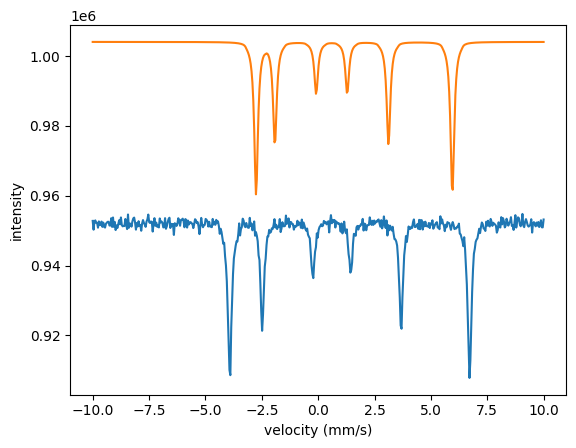

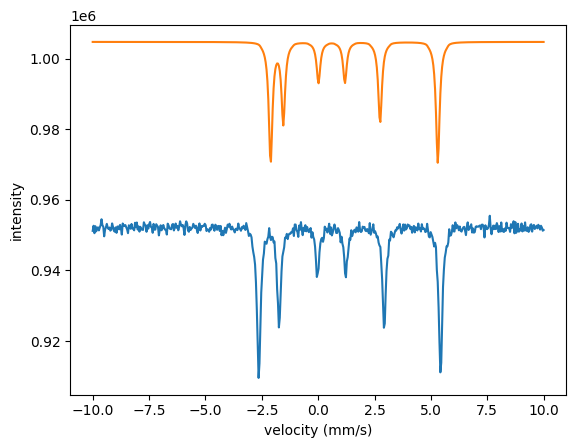

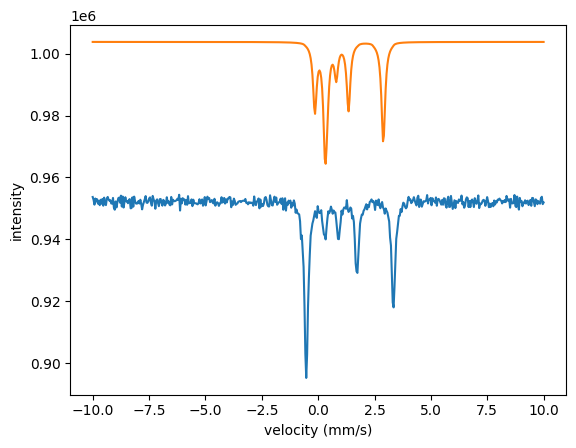

In [2]:
plt.plot(velocities_A, intensity_A)
plt.plot(velocities_A, moessbauer_spec_A())
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

plt.plot(velocities_B, intensity_B)
plt.plot(velocities_B, moessbauer_spec_B())
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

plt.plot(velocities_C, intensity_C)
plt.plot(velocities_C, moessbauer_spec_C())
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

In [3]:
# set up the fit
fit = nx.Fit(measurements = [moessbauer_spec_A, moessbauer_spec_B, moessbauer_spec_C])

fit.options.method = "Annealing"

fit()


Run Fit instance with id:  

Starting fit with 3 measurement data set(s) and 14 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |              954792 |                0 |      9.54792e+07
    1 |                    ES backgr |             94956.2 |                0 |      9.49562e+06
    2 |            Lamb Moessbauer A |                0.81 |              0.5 |                1
    3 |                       isomer |                 1.1 |                0 |              1.2
    4 |             magnetic field A |                  27 |               15 |               40
    5 |                   quadrupole |                   1 |              0.5 |              1.2
    6 |                   ES scaling |              955510 |                0 |       9.5551e+07
    7 |                    ES backgr |             94980.8 |                0 |      9.49808e+06
    8 |            Lamb Moe

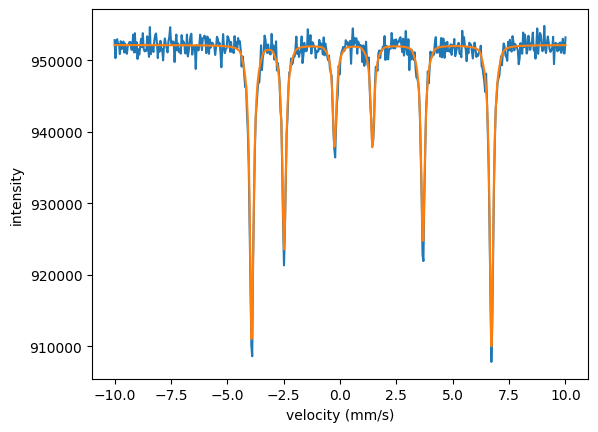

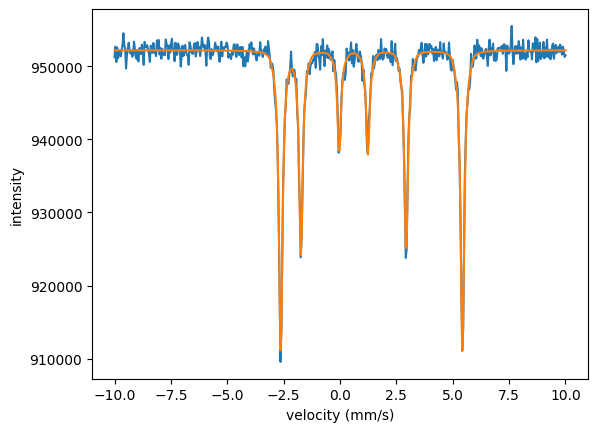

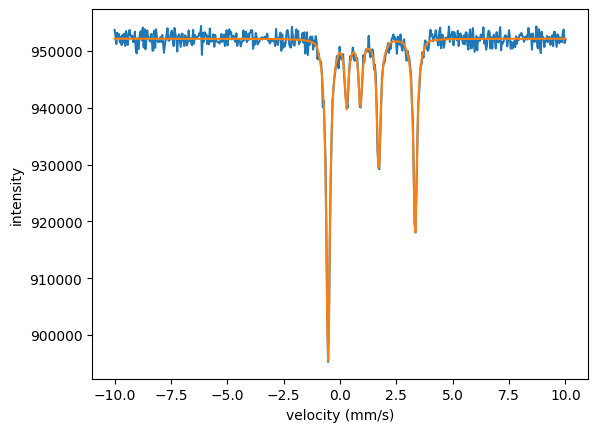

In [4]:
plt.plot(velocities_A, intensity_A)
plt.plot(velocities_A, moessbauer_spec_A.result)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

plt.plot(velocities_B, intensity_B)
plt.plot(velocities_B, moessbauer_spec_B.result)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

plt.plot(velocities_C, intensity_C)
plt.plot(velocities_C, moessbauer_spec_C.result)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()